In [1]:
# Imports
import numpy as np

from skimage.measure import label, regionprops

from scipy.spatial import distance
#from scipy.ndimage import label

from tqdm import tqdm

import sys
sys.path.append('../src/')


import matplotlib.pyplot as plt
import matplotlib.animation as animation


Bad key savefig.frameon in file /cluster/home/oschmanf/.local/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 421 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.4.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.level in file /cluster/home/oschmanf/.local/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 472 ('verbose.level  : silent      # one of silent, helpful, debug, debug-annoying')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.4.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.fileo in file /cluster/home/oschmanf/.local/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 473 ('verbose.fileo  : sys.stdout  # a log filename, sys.stdout or sys.stderr')
You pro

In [2]:
def compute_area(cell_id, num_time_steps):
    areas = []
    for i in range(num_time_steps-1):
        regs_cell = regionprops((label_stack[i] == cell_id).astype(int))
        try:
            areas.append(regs_cell[0].area)
        except IndexError:
            areas.append(0)
    areas = np.array(areas)
    return areas

def compute_length(cell_id, num_time_steps):
    lengths = []
    for i in range(num_time_steps-1):
        regs_cell = regionprops((label_stack[i] == cell_id).astype(int))
        try:
            lengths.append(regs_cell[0].major_axis_length)
        except IndexError:
            lengths.append(0)
    lengths = np.array(lengths)
    return lengths

# Load data

In [3]:
# Load data
data_inp = np.load('../data/inputs_all_red.npz')
inputs_all = data_inp['inputs_all']

data_inp = np.load('../data/label_stack.npz')
label_stack = data_inp['label_stack']

# Select examples

In [4]:
max_cell = np.max(label_stack)
num_time_steps = len(label_stack)

areas_all_cells = [len(np.where(compute_area(m, num_time_steps) == 0)[0]) for m in range(int(max_cell))]

np.where(np.array(areas_all_cells) == 0)

(array([  0,   6,   7,   8,   9,  11,  13,  14,  15,  17,  20,  22,  23,
         25,  26,  32,  33,  36,  37,  39,  43,  45,  46,  52,  53,  55,
         58,  62,  64,  65,  66,  67,  68,  69,  71,  73,  74,  75,  77,
         87,  95,  99, 101, 106, 108, 116, 118, 131, 135, 142, 146, 147,
        148, 153, 157, 158, 159, 163, 167, 183]),)

# Animations

## Single cell

In [5]:
cell_id = 183

<IPython.core.display.Javascript object>


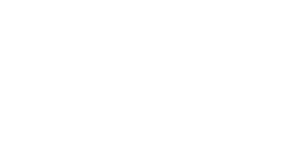

In [6]:
%matplotlib notebook

fig = plt.figure()

def f(frame):
    return (label_stack[frame] == cell_id)

start_frame = np.where(label_stack == cell_id)[0][0]
frame = start_frame

ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], facecolor='#cfd98c')
im = ax.imshow(f(frame), animated=True)
title = ax.text(0.5,1.05, "", bbox={'facecolor':'w', 'alpha':0.5, 'pad':5},
                transform=ax.transAxes, ha="center")


def updatefig(*args):
    global frame
    if frame < 50:
        frame += int(1)
    elif frame >= 50:
        frame = start_frame
    im.set_array(f(frame))
    #im.suptitle(str(frame))
    title.set_text('frame = ' + str(frame))
    return im, title

def animate(frame_num):
    return label_stack[frame_num]

ani = animation.FuncAnimation(fig, updatefig, interval=50, repeat=True)
plt.show()

## All cells

<IPython.core.display.Javascript object>


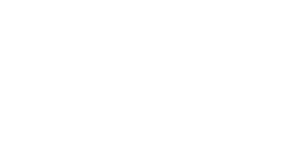

/cluster/home/oschmanf/.local/lib/python3.7/site-packages/matplotlib/animation.py:974: UserWarning: Animation was deleted without rendering anything. This is most likely unintended. To prevent deletion, assign the Animation to a variable that exists for as long as you need the Animation.
  'Animation was deleted without rendering anything. This is '


In [7]:
%matplotlib notebook
fig = plt.figure()

def f(frame):
    return (label_stack[frame])

frame = 0

ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], facecolor='#cfd98c')
im = ax.imshow(f(frame), animated=True)
title = ax.text(0.5,1.05, "", bbox={'facecolor':'w', 'alpha':0.5, 'pad':5},
                transform=ax.transAxes, ha="center")


def updatefig(*args):
    global frame
    if frame < 50:
        frame += int(1)
    elif frame >= 50:
        frame = 0
    im.set_array(f(frame))
    #im.suptitle(str(frame))
    title.set_text('frame = ' + str(frame))
    return im, title

def animate(frame_num):
    return label_stack[frame_num]

ani = animation.FuncAnimation(fig, updatefig, interval=50, repeat=True)
plt.show()

## Features

In [8]:
cell_id=183

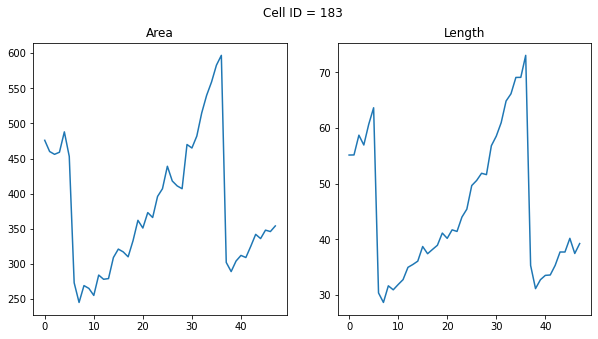

In [9]:
%matplotlib inline

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(compute_area(cell_id, num_time_steps))
plt.title('Area')

plt.subplot(1,2,2)
plt.plot(compute_length(cell_id, num_time_steps))
plt.title('Length')

plt.suptitle('Cell ID = ' + str(cell_id))

plt.show()

# Segmentation: good and bad examples

Text(0.5, 0.98, 'Timeframe 5')

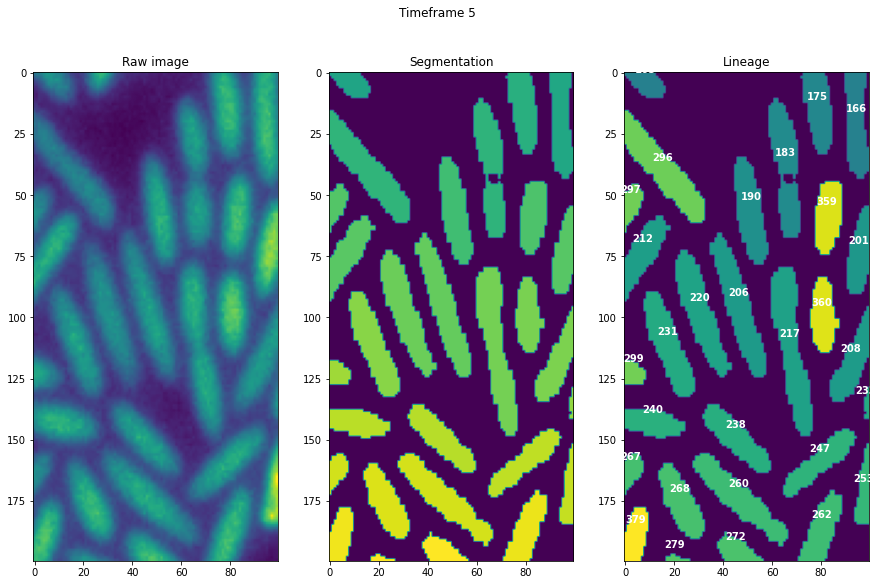

In [10]:
time_frame=5
plt.figure(figsize = (15,9))

plt.subplot(1,3,1)
plt.imshow(inputs_all[time_frame][300:500,150:250,0])
plt.title('Raw image')

plt.subplot(1,3,2)
plt.imshow(inputs_all[time_frame][300:500,150:250,1])
plt.title('Segmentation')

ax = plt.subplot(1,3,3)
img = label_stack[time_frame][300:500,150:250]
plt.imshow(img)
plt.title('Lineage')
reg = regionprops(img.astype(int))
center = [r.centroid for r in reg]
labels = [r.label for r in reg]
for i,c in enumerate(center):
    x, y = c
    x=int(np.ceil(x))
    y=int(np.ceil(y))
    ax.text(y-5,x-5, str(int(img[x,y])), color='w', weight='bold')#str(int(labels[i]))
plt.suptitle('Timeframe 5')

Text(0.5, 0.98, 'Timeframe 6')

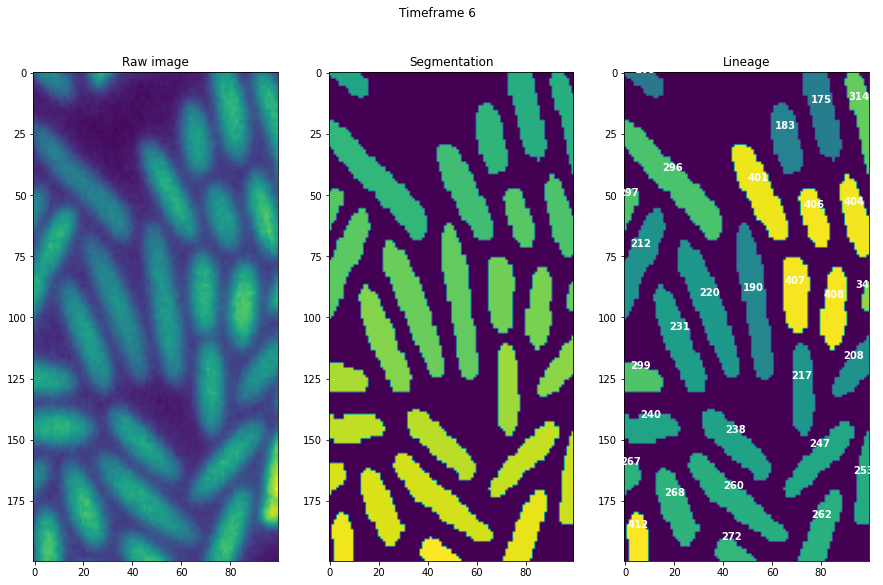

In [11]:
time_frame=6
plt.figure(figsize = (15,9))

plt.subplot(1,3,1)
plt.imshow(inputs_all[time_frame][300:500,150:250,0])
plt.title('Raw image')

plt.subplot(1,3,2)
plt.imshow(inputs_all[time_frame][300:500,150:250,1])
plt.title('Segmentation')

ax = plt.subplot(1,3,3)
img = label_stack[time_frame][300:500,150:250]
plt.imshow(img)
plt.title('Lineage')
reg = regionprops(img.astype(int))
center = [r.centroid for r in reg]
labels = [r.label for r in reg]
for i,c in enumerate(center):
    x, y = c
    x=int(np.ceil(x))
    y=int(np.ceil(y))
    ax.text(y-5,x-5, str(int(img[x,y])), color='w', weight='bold')#str(int(labels[i]))
plt.suptitle('Timeframe 6')

Text(0.5, 0.98, 'Timeframe 7')

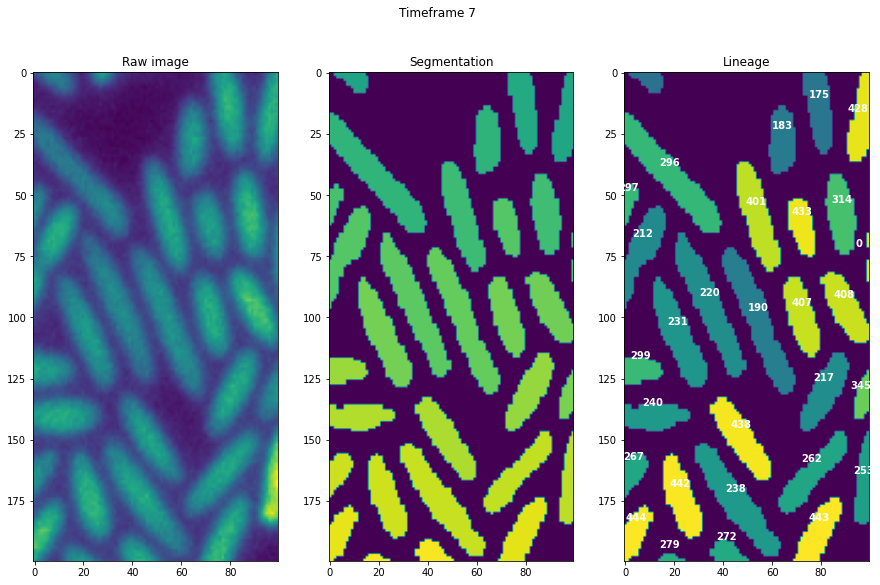

In [12]:
time_frame=7
plt.figure(figsize = (15,9))

plt.subplot(1,3,1)
plt.imshow(inputs_all[time_frame][300:500,150:250,0])
plt.title('Raw image')

plt.subplot(1,3,2)
plt.imshow(inputs_all[time_frame][300:500,150:250,1])
plt.title('Segmentation')

ax = plt.subplot(1,3,3)
img = label_stack[time_frame][300:500,150:250]
plt.imshow(img)
plt.title('Lineage')
reg = regionprops(img.astype(int))
center = [r.centroid for r in reg]
labels = [r.label for r in reg]
for i,c in enumerate(center):
    x, y = c
    x=int(np.ceil(x))
    y=int(np.ceil(y))
    ax.text(y-5,x-5, str(int(img[x,y])), color='w', weight='bold')#str(int(labels[i]))
plt.suptitle('Timeframe 7')